# 2. Data Understanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200
warnings.simplefilter(action='ignore')

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Fucntion for summary
def column_summary_plus(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyzes each column in a DataFrame and returns a summary of its properties.

    This improved version is faster, more accurate, and uses idiomatic pandas functions.

    Args:
        df (pd.DataFrame): The input DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame containing a summary for each column.
    """
    results_list = []  # Use a list to store results, much faster than appending to a DF

    # Loop through each column in the DataFrame
    for column in df.columns:
        # --- Basic Information ---
        col_dtype = df[column].dtype
        num_nulls = df[column].isnull().sum()
        num_non_nulls = df[column].notnull().sum()

        # --- Distinct Values Analysis ---
        value_counts = df[column].value_counts()
        num_distinct_values = len(value_counts)
        top_10_distinct = dict(value_counts.head(10))

        # --- Initialize stats as None ---
        min_value, max_value, median, average, average_non_zero = [None] * 5

        # --- Numeric Column Analysis ---
        if pd.api.types.is_numeric_dtype(df[column]):
            # Drop NA values for statistical calculations
            col_non_null = df[column].dropna()

            if not col_non_null.empty:
                min_value = col_non_null.min()
                max_value = col_non_null.max()
                median = col_non_null.median()
                average = col_non_null.mean()

                # Calculate average of non-zero values correctly
                non_zero_values = col_non_null[col_non_null != 0]
                if not non_zero_values.empty:
                    average_non_zero = non_zero_values.mean()
                else:
                    average_non_zero = 0 # Or None, depending on desired output

        # --- For non-numeric columns, min/max can still be calculated if they are sortable ---
        elif not num_distinct_values == 0:
             try:
                sorted_values = sorted(value_counts.index)
                min_value = sorted_values[0]
                max_value = sorted_values[-1]
             except TypeError:
                # This occurs if the column has mixed types that can't be sorted
                min_value = "Unsortable"
                max_value = "Unsortable"


        # Append all info for the column as a dictionary to our list
        results_list.append({
            'col_name': column,
            'col_dtype': col_dtype,
            'nulls_num': num_nulls,
            'non_nulls_num': num_non_nulls,
            'null_present': 1 if num_nulls > 0 else 0,
            'num_distinct_values': num_distinct_values,
            'min_value': min_value,
            'max_value': max_value,
            'median_no_na': median,
            'average_no_na': average,
            'average_non_zero': average_non_zero,
            'distinct_values_top_10': top_10_distinct
        })

    # Create the final DataFrame from the list of dictionaries in one go
    return pd.DataFrame(results_list)

In [ ]:
# Check summary of data
summary_df = column_summary_plus(df)
display(summary_df)

,col_name,col_dtype,nulls_num,non_nulls_num,null_present,num_distinct_values,min_value,max_value,median_no_na,average_no_na,average_non_zero,distinct_values_top_10
0,customerID,object,0,7043,0,7043,0002-ORFBO,9995-HOTOH,NaN,NaN,NaN,"{'7590-VHVEG': 1, '3791-LGQCY': 1, '6008-NAIXK..."
1,gender,object,0,7043,0,2,Female,Male,NaN,NaN,NaN,"{'Male': 3555, 'Female': 3488}"
2,SeniorCitizen,int64,0,7043,0,2,0,1,0.00,0.162147,1.000000,"{0: 5901, 1: 1142}"
3,Partner,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'No': 3641, 'Yes': 3402}"
4,Dependents,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'No': 4933, 'Yes': 2110}"
5,tenure,int64,0,7043,0,73,0,72,29.00,32.371149,32.421786,"{1: 613, 72: 362, 2: 238, 3: 200, 4: 176, 71: ..."
6,PhoneService,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'Yes': 6361, 'No': 682}"
7,MultipleLines,object,0,7043,0,3,No,Yes,NaN,NaN,NaN,"{'No': 3390, 'Yes': 2971, 'No phone service': ..."
8,InternetService,object,0,7043,0,3,DSL,No,NaN,NaN,NaN,"{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}"
9,OnlineSecurity,object,0,7043,0,3,No,Yes,NaN,NaN,NaN,"{'No': 3498, 'Yes': 2019, 'No internet service..."


# 3. Exploratory Data Analysis (EDA)

### 3.1 High-Level Overview & Target Variable Analysis

#### Overall Churnrate

In [ ]:
# Create a mapping dictionary
churn_map = {'Yes': 1, 'No': 0}

# Apply the map to the 'Churn' column
df['Churn'] = df['Churn'].map(churn_map)

# Verify the change
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# The mean of a 0/1 column is the proportion of 1s
churn_rate = df['Churn'].mean()

print(f"The overall churn rate is: {churn_rate:.2%}")

The overall churn rate is: 26.54%


### 3.2 Demographic Analysis

#### Gender

- Does the churn rate differ significantly between gender (Male vs. Female)?

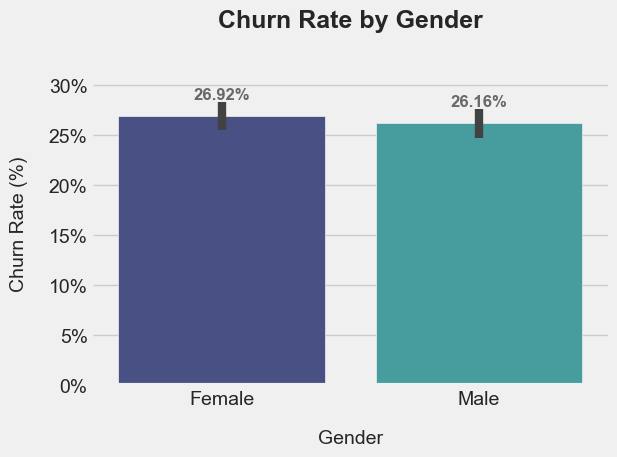

In [ ]:
# Define the overall aesthetic of the plot for a clean, journalistic look.
plt.style.use('fivethirtyeight')

# Generate the core visualization, mapping gender to the x-axis and churn rate to the y-axis.
# A subtle, professional color palette ('mako') is used.
ax = sns.barplot(data=df, x='gender', y='Churn', palette='mako')

# Expand the y-axis to create whitespace above the bars, preventing text from feeling cramped.
max_churn_rate = df.groupby('gender')['Churn'].mean().max()
plt.ylim(0, max_churn_rate * 1.2)

# Provide context for the audience with a clear, bold title and descriptive axis labels.
plt.title('Churn Rate by Gender', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Gender', fontsize=14, labelpad=15)
plt.ylabel('Churn Rate (%)', fontsize=14, labelpad=15)

# Display the precise churn rate on each bar for immediate data consumption.
# The text is bolded and positioned for maximum readability.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='dimgrey',
                fontweight='bold')

# Declutter the plot by removing non-essential chart elements like borders (spines) and ticks.
sns.despine(left=True, bottom=False)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0, labelleft=True)

# Ensure the y-axis scale is intuitively understood by formatting the labels as percentages.
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Render the final, polished visualization, ensuring all elements fit perfectly.
plt.tight_layout()
plt.show()

This chart visualizes the relationship between gender and customer churn. We can observe that the number of male and female customers in the dataset is roughly equal. More importantly, the proportion of churn to non-churn is very similar across both genders. This indicates that gender is not a significant factor or a strong predictor of a customer's decision to churn.

#### SeniorCitizen

- Are SeniorCitizens more likely to churn compared to younger customers? What is the churn rate for each group?

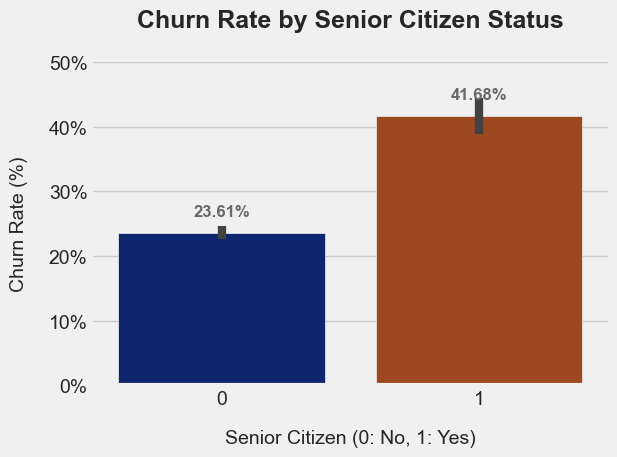

In [ ]:
# Apply a professional visual style for consistency and readability.
plt.style.use('fivethirtyeight')

# Create a bar plot to compare churn rates for Senior Citizens vs. Non-Senior Citizens.
# The 'SeniorCitizen' column (0 or 1) serves as the categorical grouping.
ax = sns.barplot(data=df, x='SeniorCitizen', y='Churn', palette='dark')

# Expand the y-axis to ensure annotation text is clearly visible above the bars.
max_churn_rate = df.groupby('SeniorCitizen')['Churn'].mean().max()
plt.ylim(0, max_churn_rate * 1.2)

# Set the title and axis labels for clear understanding of the plot's message.
plt.title('Churn Rate by Senior Citizen Status', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Senior Citizen (0: No, 1: Yes)', fontsize=14, labelpad=15)
plt.ylabel('Churn Rate (%)', fontsize=14, labelpad=15)

# Annotate each bar with its precise churn rate percentage.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='dimgrey',
                fontweight='bold')

# Refine the plot aesthetics by removing unnecessary chart borders and ticks.
sns.despine(left=True, bottom=False)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0, labelleft=True)

# Format the y-axis labels as percentages for direct interpretation.
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Finalize the plot layout and display the visualization.
plt.tight_layout()
plt.show()

This visualization compares churn rates between senior citizens and non-senior citizens, and it reveals a critical insight. While the absolute number of senior citizens is lower, their churn rate is disproportionately high compared to younger customers. As seen in the graph, the ratio of churned to non-churned customers is nearly 1:1 for seniors, whereas non-seniors are far more likely to remain. This suggests that being a senior citizen is a strong indicator of a higher likelihood to churn. This group may have different needs or be more sensitive to factors like price or service complexity.

#### Partner & Dependents:

- How does having a Partner affect the likelihood of churning?
- Does the presence of Dependents influence the churn rate?

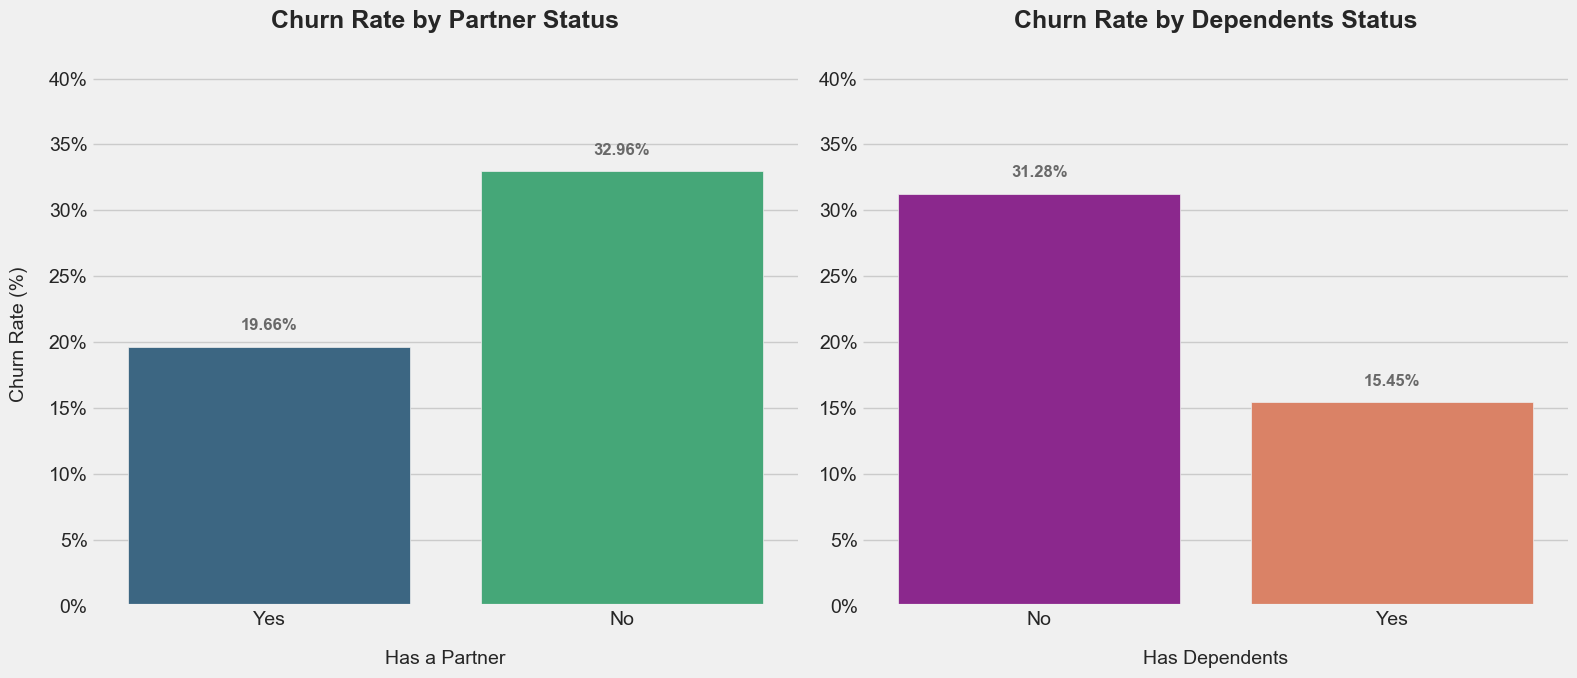

In [ ]:
# Apply a professional visual style for the plots.
plt.style.use('fivethirtyeight')

# Create a figure that will contain two separate plots (side-by-side).
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Churn Rate by Partner Status (FIX APPLIED) ---

# Generate the bar plot on the first axis (ax1), removing the error bars.
sns.barplot(data=df, x='Partner', y='Churn', palette='viridis', ax=ax1, errorbar=None) # <-- FIX IS HERE
ax1.set_title('Churn Rate by Partner Status', fontsize=18, fontweight='bold', pad=25)
ax1.set_xlabel('Has a Partner', fontsize=14, labelpad=15)
ax1.set_ylabel('Churn Rate (%)', fontsize=14, labelpad=15)

# Annotate each bar with its precise churn rate percentage.
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 10),
                 textcoords='offset points', fontsize=12,
                 color='dimgrey', fontweight='bold')

# --- Plot 2: Churn Rate by Dependents Status (FIX APPLIED) ---

# Generate the bar plot on the second axis (ax2), removing the error bars.
sns.barplot(data=df, x='Dependents', y='Churn', palette='plasma', ax=ax2, errorbar=None) # <-- FIX IS HERE
ax2.set_title('Churn Rate by Dependents Status', fontsize=18, fontweight='bold', pad=25)
ax2.set_xlabel('Has Dependents', fontsize=14, labelpad=15)
ax2.set_ylabel('')

# Annotate each bar with its precise churn rate percentage.
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2%}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 10),
                 textcoords='offset points', fontsize=12,
                 color='dimgrey', fontweight='bold')

# --- Final Polishing for Both Plots ---

# Unify the y-axis limits for a fair visual comparison between the two plots.
max_rate = max(df.groupby('Partner')['Churn'].mean().max(), df.groupby('Dependents')['Churn'].mean().max())
ax1.set_ylim(0, max_rate * 1.25)
ax2.set_ylim(0, max_rate * 1.25)

# Format the y-axis labels as percentages for direct interpretation.
for ax in [ax1, ax2]:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0, labelleft=True)
    sns.despine(ax=ax, left=True, bottom=False)

# Render the final visualization, ensuring all elements fit perfectly.
plt.tight_layout()
plt.show()

By examining the 'Partner' and 'Dependents' charts together, we can analyze the impact of a customer's household structure on churn. The trend is identical and clear across both visualizations: customers who are single and those without dependents are significantly more likely to churn.

This suggests that customers in a more established family unit, whether with a partner or children, tend to be more stable and loyal. Having these family ties appears to be a strong indicator of customer retention, as these individuals are less likely to switch services compared to those without such commitments.

### **3.3 Count and Financial Analysis**

#### Tenure
- How is tenure (customer lifetime in months) distributed for customers who churned versus those who did not? (A histogram or box plot is excellent for this).
- Are new customers (low tenure) more prone to churning?

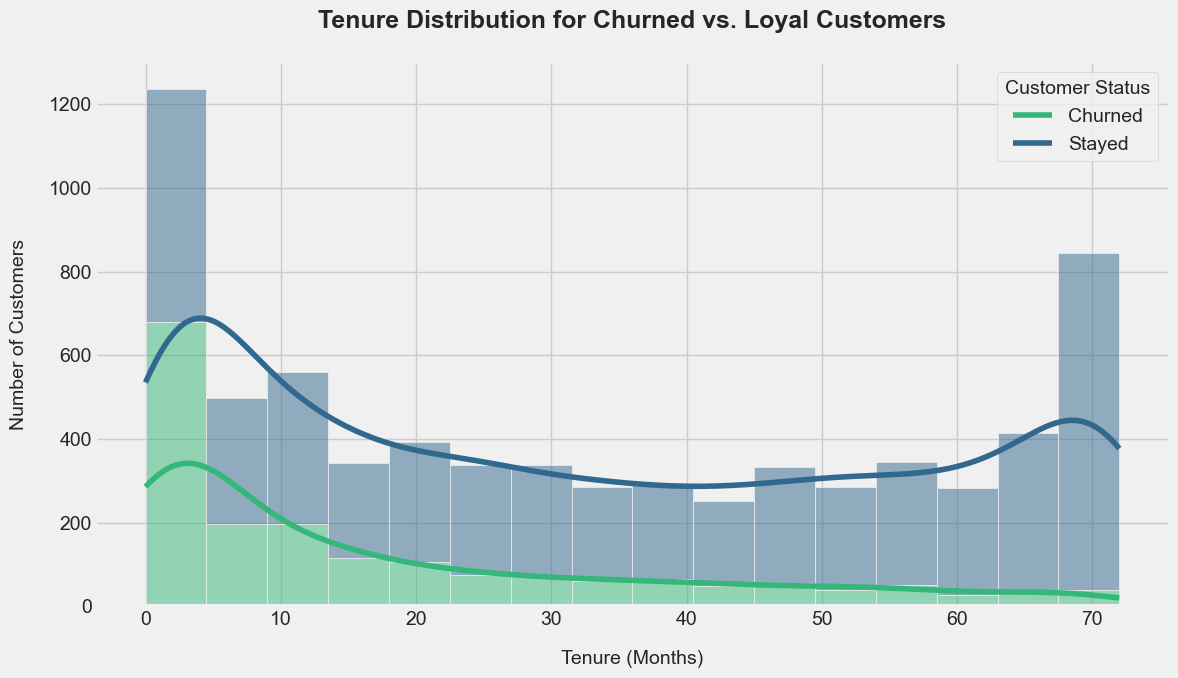

In [ ]:
## Distributed for Churned vs Loyal Customers

# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot.
plt.figure(figsize=(12, 7))

# Create two overlapping histograms with density curves (KDE).
# The 'hue' parameter automatically separates the data by 'Churn' status.
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='viridis', multiple='stack')

# Set a clear title and axis labels to provide context.
plt.title('Tenure Distribution for Churned vs. Loyal Customers', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Tenure (Months)', fontsize=14, labelpad=15)
plt.ylabel('Number of Customers', fontsize=14, labelpad=15)

# Improve legend clarity.
plt.legend(title='Customer Status', labels=['Churned', 'Stayed'])

# Refine plot aesthetics by removing unnecessary chart borders.
sns.despine(left=True, bottom=False)

# Render the final visualization.
plt.tight_layout()
plt.show()

This histogram powerfully visualizes the relationship between customer tenure (how long they've been a customer) and churn. The green "Churned" distribution is heavily skewed to the left, showing a massive spike in customers leaving within their first few months. In contrast, the blue "Stayed" distribution shows that customers who remain with the service tend to be either very new or very long-term (loyal). This tells us that the highest risk of churn occurs very early in the customer lifecycle. After a customer passes a certain tenure threshold, their loyalty increases significantly.

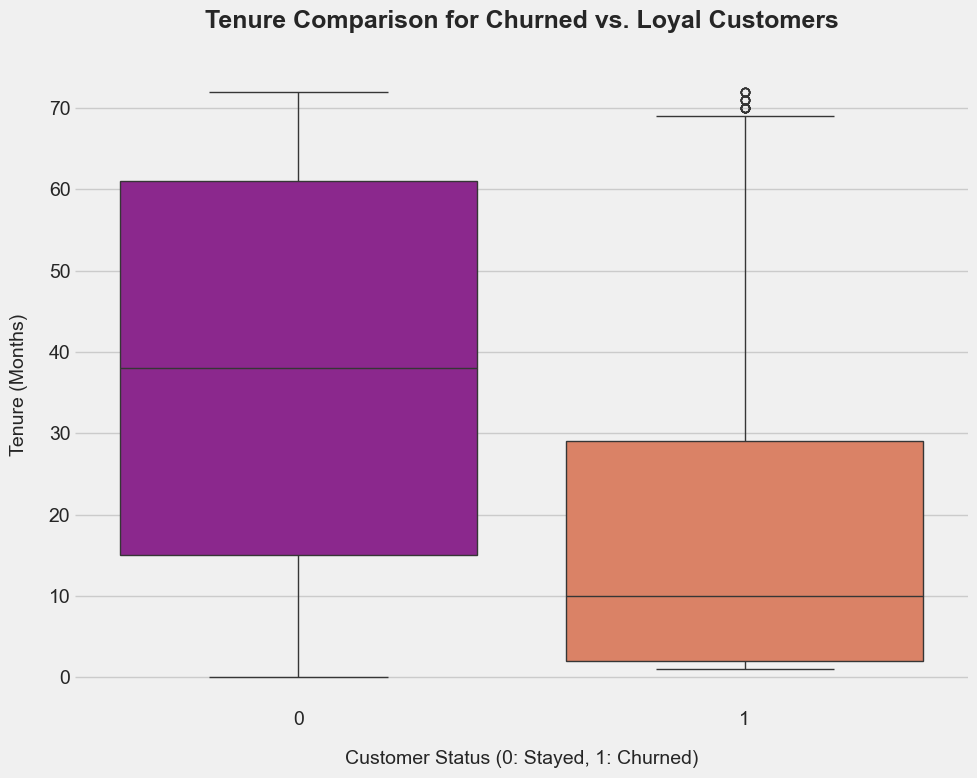

In [ ]:
# Create a figure for the plot.
plt.figure(figsize=(10, 8))

# Generate a box plot to compare the tenure distributions for each churn category.
sns.boxplot(data=df, x='Churn', y='tenure', palette='plasma')

# Set a clear title and axis labels for context.
plt.title('Tenure Comparison for Churned vs. Loyal Customers', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Customer Status (0: Stayed, 1: Churned)', fontsize=14, labelpad=15)
plt.ylabel('Tenure (Months)', fontsize=14, labelpad=15)

# Refine plot aesthetics by removing unnecessary chart borders.
sns.despine(left=True, bottom=False)

# Render the final visualization.
plt.tight_layout()
plt.show()

This box plot reinforces the findings from the histogram. It clearly shows that the median tenure for customers who churned (labeled '1') is extremely low—around 10 months. For customers who stayed (labeled '0'), the median tenure is much higher, close to 40 months. This confirms that customers with short tenure are far more likely to churn. New customers are the most vulnerable group, and retaining them beyond the initial months is critical.

#### Contract

- What is the churn rate for each Contract type (Month-to-month, One year, Two year)? This is often a very strong indicator.

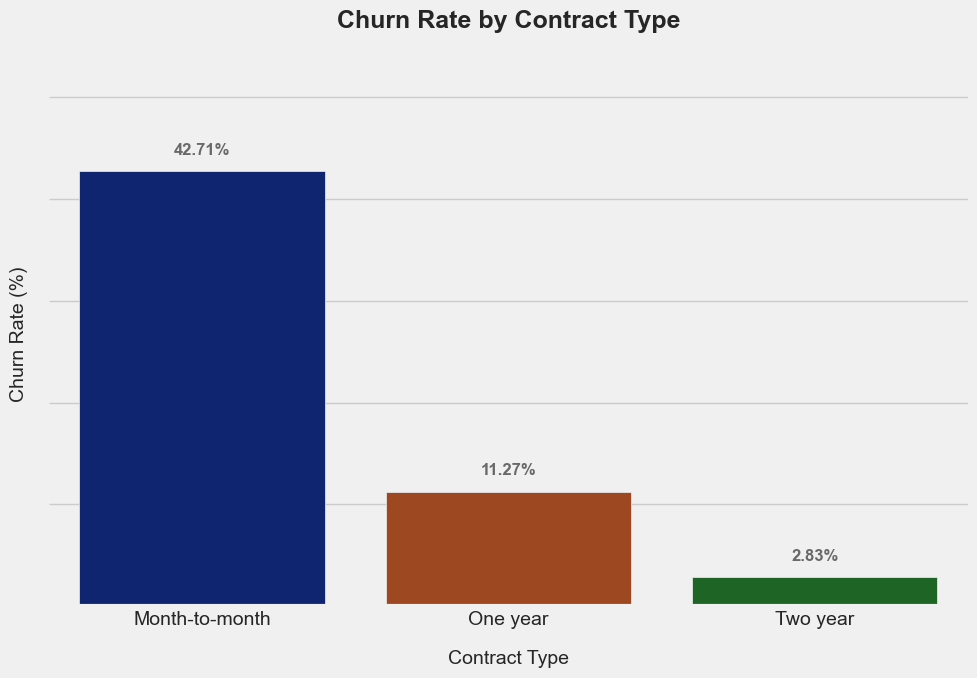

In [ ]:
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot.
plt.figure(figsize=(10, 7))

# Generate a bar plot to show churn rate for each contract type, with no error bars.
ax = sns.barplot(data=df, x='Contract', y='Churn', palette='dark', errorbar=None) # <-- FIX IS HERE

# Expand the y-axis to ensure annotation text is clearly visible above the bars.
max_churn_rate = df.groupby('Contract')['Churn'].mean().max()
plt.ylim(0, max_churn_rate * 1.25)

# Set a clear title and axis labels for context.
plt.title('Churn Rate by Contract Type', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Contract Type', fontsize=14, labelpad=15)
plt.ylabel('Churn Rate (%)', fontsize=14, labelpad=15) # Re-added (%) as the primary metric is rate.

# Annotate each bar with its precise churn rate percentage.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='dimgrey',
                fontweight='bold')

# Refine plot aesthetics by removing unnecessary chart borders and ticks.
sns.despine(left=True, bottom=False)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0, labelleft=False) # Keep y-axis labels hidden as annotations are present.

# Format the y-axis (if labels were present) as percentages for direct interpretation.
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Render the final visualization.
plt.tight_layout()
plt.show()

This chart reveals one of the most powerful predictors of churn. The churn rate for customers on a Month-to-month contract is a staggering 42.7%. This is drastically higher than for customers on a One-year (11.3%) or Two-year (2.8%) contract. The conclusion is clear: long-term contracts significantly increase customer loyalty and reduce churn. The flexibility of a monthly contract makes it easy for customers to leave.

#### Payment & Billing:

- Does the churn rate vary by PaymentMethod? Are customers paying by 'Electronic check' more likely to churn?
- Is there a difference in churn between customers who opted for PaperlessBilling and those who did not?

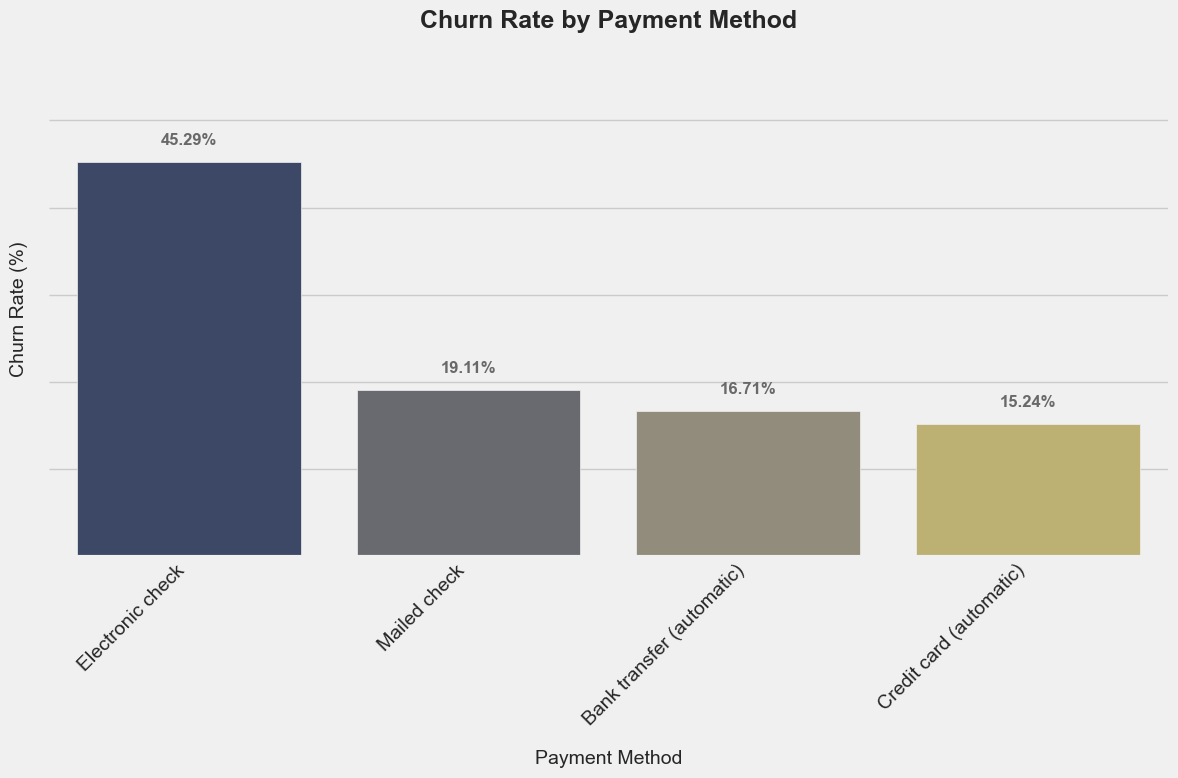

In [ ]:
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot, making it slightly taller to accommodate rotated labels.
plt.figure(figsize=(12, 8))

# Generate a bar plot to show churn rate for each payment method, with no error bars.
ax = sns.barplot(data=df, x='PaymentMethod', y='Churn', palette='cividis', errorbar=None)

# Expand the y-axis to ensure annotation text is clearly visible above the bars.
max_churn_rate = df.groupby('PaymentMethod')['Churn'].mean().max()
plt.ylim(0, max_churn_rate * 1.25)

# Set a clear title and axis labels for context.
plt.title('Churn Rate by Payment Method', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Payment Method', fontsize=14, labelpad=15)
plt.ylabel('Churn Rate (%)', fontsize=14, labelpad=15)

# Annotate each bar with its precise churn rate percentage.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='dimgrey',
                fontweight='bold')

# Rotate x-axis labels for better readability.
# 'ha="right"' aligns the end of the label with the tick.
plt.xticks(rotation=45, ha="right")

# Refine plot aesthetics by removing unnecessary chart borders and ticks.
sns.despine(left=True, bottom=False)
ax.tick_params(axis='y', length=0, labelleft=False)

# Render the final visualization, ensuring all elements fit perfectly.
plt.tight_layout()
plt.show()

The payment method is a critical factor. The chart shows that customers paying by Electronic check have an exceptionally high churn rate of 45.3%. All other methods, especially the automatic ones like bank transfer and credit card, have much lower churn rates (15-19%). This suggests that payment methods that require manual monthly effort (like electronic checks) give customers a regular opportunity to reconsider the service, whereas automatic, "set-it-and-forget-it" payment methods promote customer retention.

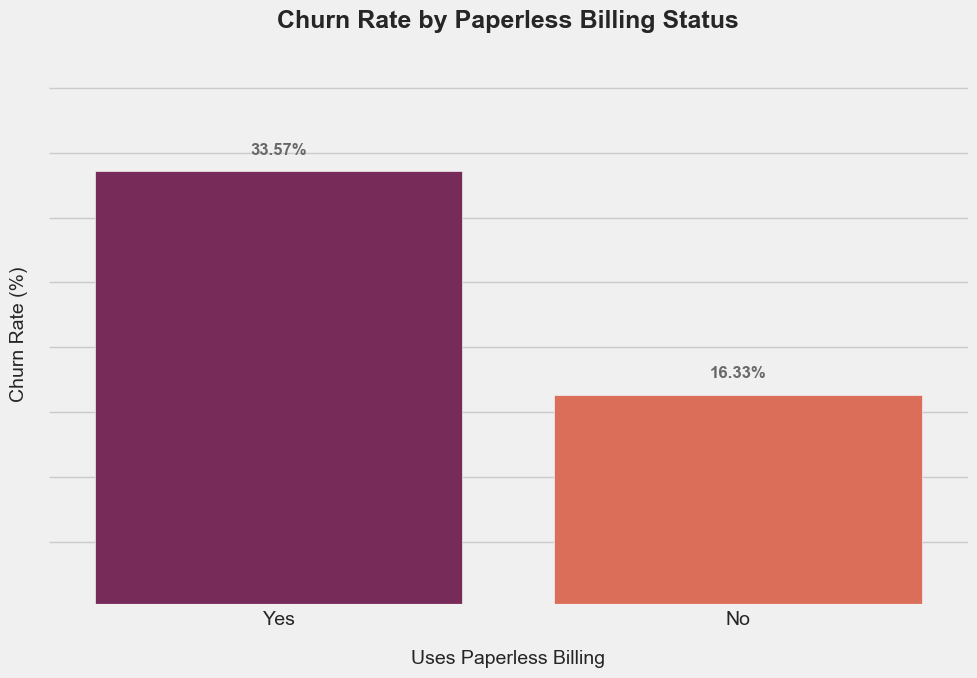

In [ ]:
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot.
plt.figure(figsize=(10, 7))

# Generate a bar plot to show churn rate for each PaperlessBilling status, with no error bars.
ax = sns.barplot(data=df, x='PaperlessBilling', y='Churn', palette='rocket', errorbar=None)

# Expand the y-axis to ensure annotation text is clearly visible above the bars.
max_churn_rate = df.groupby('PaperlessBilling')['Churn'].mean().max()
plt.ylim(0, max_churn_rate * 1.25)

# Set a clear title and axis labels for context.
plt.title('Churn Rate by Paperless Billing Status', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Uses Paperless Billing', fontsize=14, labelpad=15)
plt.ylabel('Churn Rate (%)', fontsize=14, labelpad=15)

# Annotate each bar with its precise churn rate percentage.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12,
                color='dimgrey',
                fontweight='bold')

# Refine plot aesthetics by removing unnecessary chart borders and ticks.
sns.despine(left=True, bottom=False)
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0, labelleft=False) # Hide y-axis labels as annotations are present.

# Render the final visualization.
plt.tight_layout()
plt.show()

This chart shows a surprisingly strong relationship between billing method and churn. Customers who use Paperless Billing have a churn rate (33.6%) that is more than double that of customers who receive paper bills (16.3%). While the exact cause isn't certain, it could be that customers who are more tech-savvy (and thus opt for paperless billing) are also more comfortable searching for and switching to competing services online.

#### Charges:

- What is the distribution of MonthlyCharges for churned vs. non-churned customers?
- How does TotalCharges relate to churn? (Be careful: TotalCharges might be empty for customers with zero tenure).
- Is there a strong correlation between tenure, MonthlyCharges, and TotalCharges? (A correlation heatmap is useful here).

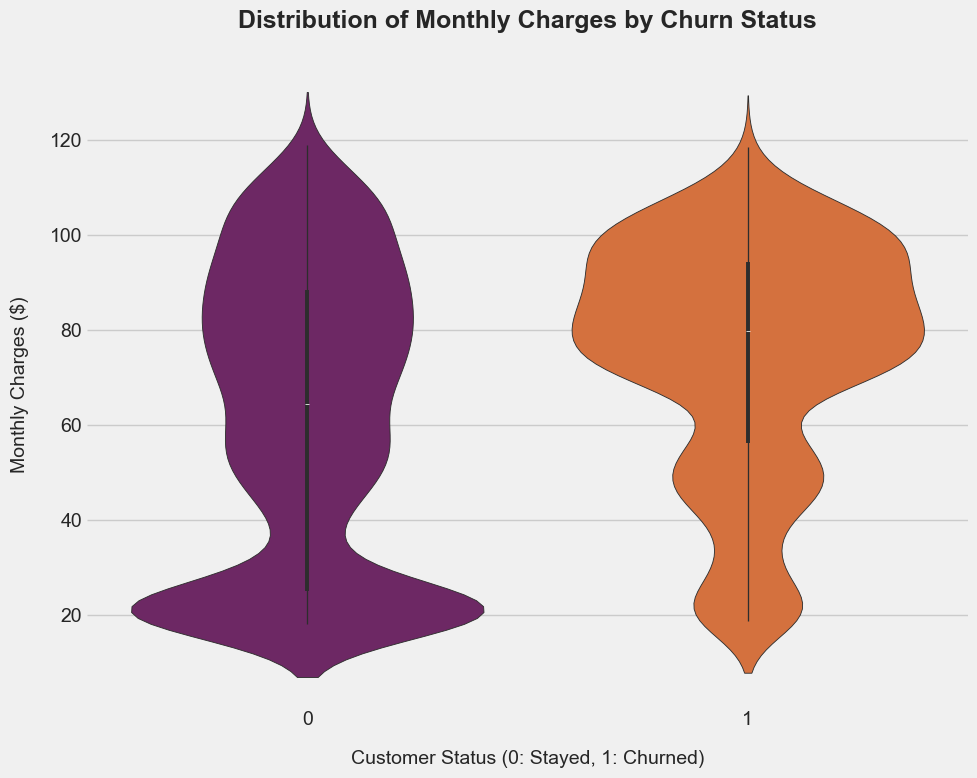

In [ ]:
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot.
plt.figure(figsize=(10, 8))

# Generate a violin plot to compare the MonthlyCharges distributions.
# This plot combines a box plot with a kernel density estimate.
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette='inferno')

# Set a clear title and axis labels for context.
plt.title('Distribution of Monthly Charges by Churn Status', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Customer Status (0: Stayed, 1: Churned)', fontsize=14, labelpad=15)
plt.ylabel('Monthly Charges ($)', fontsize=14, labelpad=15)

# Refine plot aesthetics by removing unnecessary chart borders.
sns.despine(left=True, bottom=False)

# Render the final visualization.
plt.tight_layout()
plt.show()

This violin plot compares the distribution of monthly charges for customers who churned versus those who stayed. We can see that the plot for churned customers ('1') is centered higher than for loyal customers ('0'). The widest parts of the churned plot are between $70 and $110, indicating a high concentration of churners in that price range. This suggests that customers with higher monthly charges are more likely to churn, likely due to price sensitivity or seeking better value elsewhere

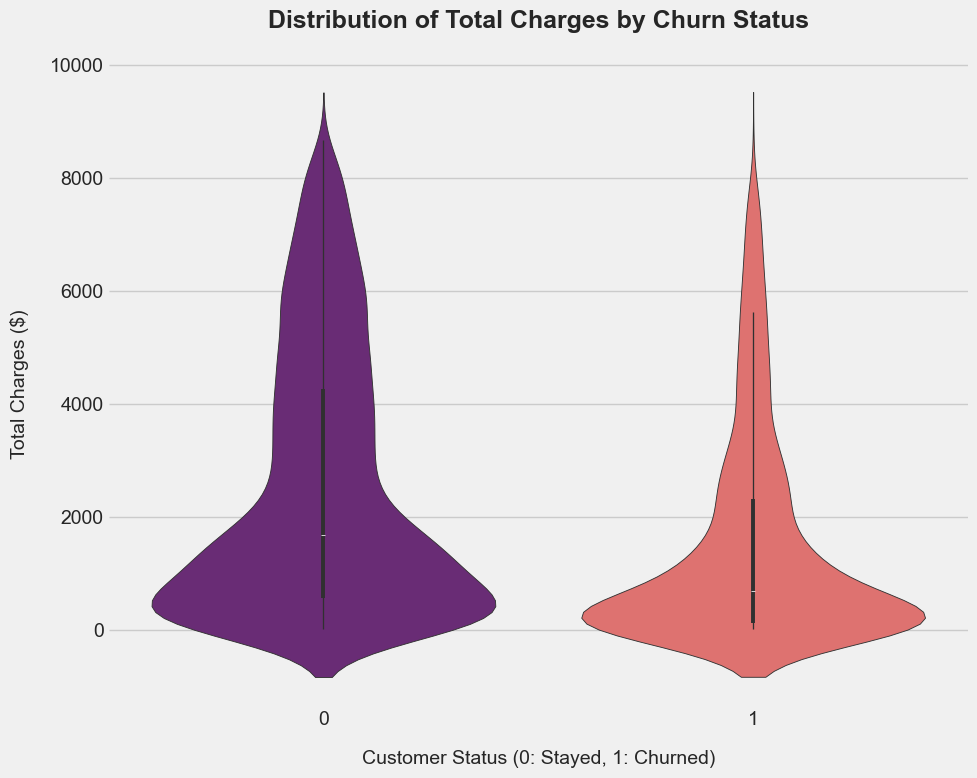

In [ ]:
# --- Data Cleaning Step ---
# 'TotalCharges' can contain spaces for new customers, which is not a number.
# We convert it to a numeric type. 'errors="coerce"' will turn any problematic values (like spaces) into NaN (Not a Number).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# For the visualization, seaborn will automatically ignore these NaN values, which is appropriate.

# --- Visualization Step ---
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Create a figure for the plot.
plt.figure(figsize=(10, 8))

# Generate a violin plot to compare the TotalCharges distributions.
sns.violinplot(data=df, x='Churn', y='TotalCharges', palette='magma')

# Set a clear title and axis labels for context.
plt.title('Distribution of Total Charges by Churn Status', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Customer Status (0: Stayed, 1: Churned)', fontsize=14, labelpad=15)
plt.ylabel('Total Charges ($)', fontsize=14, labelpad=15)

# Refine plot aesthetics by removing unnecessary chart borders.
sns.despine(left=True, bottom=False)

# Render the final visualization.
plt.tight_layout()
plt.show()

This plot shows that customers who churned ('1') have a distribution of total charges that is heavily concentrated at the lower end. This might seem counterintuitive, but it's a direct result of the tenure effect: customers churn early, so they don't have time to accumulate high total charges. This chart doesn't mean low total charges cause churn; rather, it's an effect of early churn. It strongly supports the conclusion that new customers (who inherently have low total charges) are the primary group that churns.

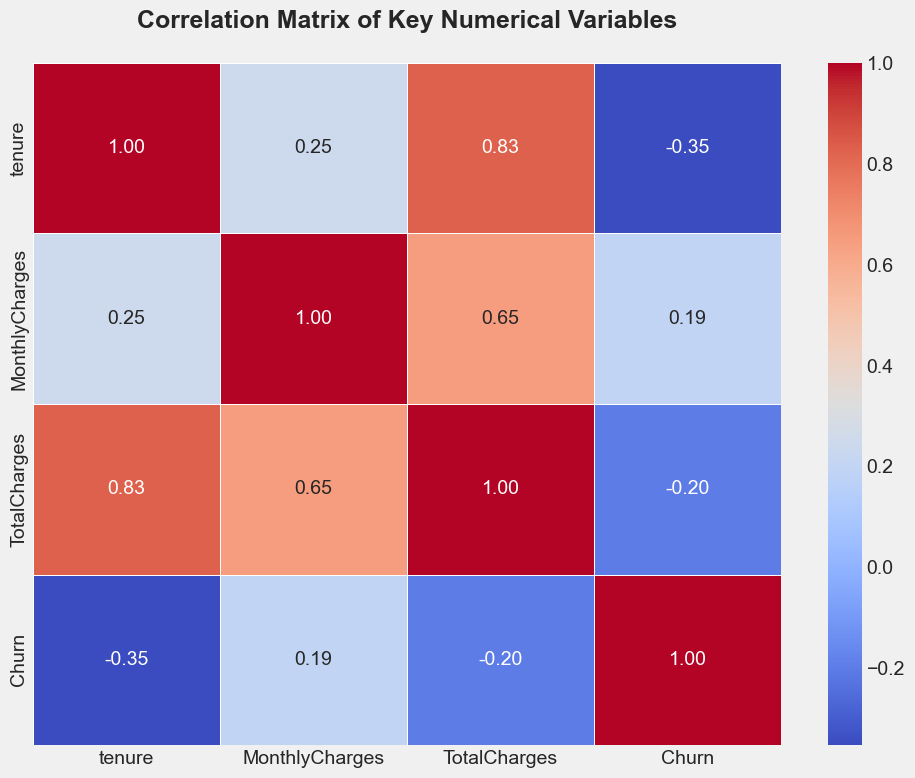

In [ ]:
# Ensure 'TotalCharges' is numeric, handling potential errors as before.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# --- Visualization Step ---
# Apply a professional visual style for the plot.
plt.style.use('fivethirtyeight')

# Select the numerical columns of interest for the correlation analysis.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
correlation_matrix = df[numerical_cols].corr()

# Create a figure for the heatmap.
plt.figure(figsize=(10, 8))

# Generate the heatmap.
# 'annot=True' writes the data value in each cell.
# 'cmap="coolwarm"' is a good choice for correlations (positive=warm, negative=cool).
# 'fmt=".2f"' formats the annotation to two decimal places.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set a clear title.
plt.title('Correlation Matrix of Key Numerical Variables', fontsize=18, fontweight='bold', pad=25)

# Render the final visualization.
plt.tight_layout()
plt.show()

This heatmap numerically confirms our previous findings.

Tenure has the strongest negative correlation with churn (-0.35), meaning as tenure goes up, the likelihood of churn goes down. This is the most significant numerical predictor.

MonthlyCharges has a positive correlation with churn (0.19), meaning as monthly bills get higher, the likelihood of churn increases.

TotalCharges has a negative correlation with churn (-0.20), which simply reflects that customers with high total charges are those with long tenure who are less likely to churn.